<a href="https://colab.research.google.com/github/Areefahnk/NNDL-18K41A0505/blob/main/Assignment_09_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**MOMENT OPTIMIZER**

**Implement in Python by - Areefa (18K41A0505)**

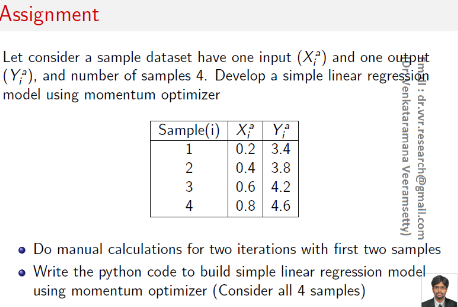

In [2]:
import pandas as pd
df = pd.read_excel('/content/drive/MyDrive/samples.xlsx')
df

,sample,x,y
0,1,0.2,3.4
1,2,0.4,3.8
2,3,0.6,4.2
3,4,0.8,4.6
4,5,1.0,5.0


**Missing values**

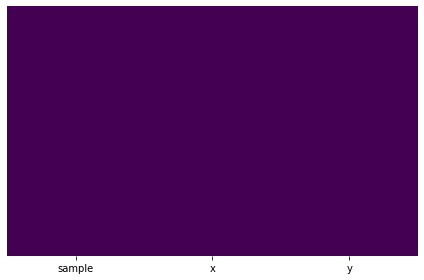

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
def get_heatmap(df):
    #This function gives heatmap of all NaN values
    plt.figure(figsize=(6,4))
    sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
    plt.tight_layout()
    return plt.show()

get_heatmap(df)

In [21]:
x_train = df.iloc[0:3,1:2]
y_train = df.iloc[0:3,2:]
x_test = df.iloc[3:,1:2]
y_test = df.iloc[3:,2:]

In [22]:
x_train

,x
0,0.2
1,0.4
2,0.6


In [23]:
y_train

,y
0,3.4
1,3.8
2,4.2


In [24]:
x_test

,x
3,0.8
4,1.0


In [25]:
y_test

,y
3,4.6
4,5.0


In [26]:
x_train['x'][0]

0.2

In [46]:
import sympy as sym
from sympy import *
import random

mi=1
ci=-1
lr=0.1
epochs=80
gama=0.9
iter=1
sample=1
vm = vc = 0 #assuming to start from zero velocity
ns = len(x_train) #number of samples in training dataset
while iter<=epochs:
  print('ITERATION {}'.format(iter))
  sample = 1
  while sample<=ns:
    print("Sample {}".format(sample))
    #step 4: Error function for Gradient descent
    #declare the variables that you will be using in the error function
    x=sym.Symbol('x')
    y=sym.Symbol('y')
    m=sym.Symbol('m')
    c=sym.Symbol('c')
    E=(0.5)*(y-m*x-c)**2  #ERROR FUNCTION


    derivE_m=sym.diff(E,m) #differentiation of E wrto m
    derivE_c=sym.diff(E,c)  #differentiate E wrto c
    #print(derivE_m)
    #print(derivE_c)
    #print('after subs m and c')
    #print('in derivE_m')
    derivE_m = derivE_m.subs(m, mi) 
    derivE_m = derivE_m.subs(c, ci)

    xi = x_train['x'][sample-1]
    yi = y_train['y'][sample-1]
    derivE_m = derivE_m.subs(x,xi)
    derivE_m = derivE_m.subs(y,yi)

    #print(derivE_m)
    #print('in derivE_c')
    derivE_c = derivE_c.subs(m, mi) 
    derivE_c = derivE_c.subs(c, ci)
    derivE_c = derivE_c.subs(x,xi)
    derivE_c = derivE_c.subs(y,yi)

    gm = derivE_m
    gc = derivE_c

    #step 5 compute velocity (before steplen)
    vm = gama*vm - lr*gm
    vc = gama*vc - lr*gc

    #step 6 update model params
    mi = mi+vm
    ci = ci+vc
    print(mi)
    print(ci)
    print('-----------------------------------')
    #step 7 increment sample
    sample = sample+1

  iter=iter+1
  
  

print("Local minima values of m and c are: ",mi,ci)

ITERATION 1
Sample 1
1.08400000000000
-0.580000000000000
-----------------------------------
Sample 2
1.31745600000000
0.192640000000000
-----------------------------------
Sample 3
1.72057958400000
1.20970464000000
-----------------------------------
ITERATION 2
Sample 1
2.12031439846400
2.30968076032000
-----------------------------------
Sample 2
2.50576347069338
3.36387861663744
-----------------------------------
Sample 3
2.81262743375661
4.24592301741779
-----------------------------------
ITERATION 3
Sample 1
3.06063603043013
4.89891812770319
-----------------------------------
Sample 2
3.19091686584129
5.25429647297253
-----------------------------------
Sample 3
3.13003882216270
5.27725232446720
-----------------------------------
ITERATION 4
Sample 1
3.02518338107398
5.04758658192244
-----------------------------------
Sample 2
2.83250708672004
4.59512142019694
-----------------------------------
Sample 3
2.53342088146776
3.97844020742110
-----------------------------------
I

**TRAINING ERROR**

In [47]:
y_train_pred = []
for i in range(0,len(x_train)):
  ycalc = mi*x_train['x'][i]+ci
  y_train_pred.append(ycalc)
y_train_pred

[3.40002188841413, 3.80000607275071, 4.19999025708729]

In [48]:
y_train_list = list(y_train['y']) #typecasting tuple to list
y_train_list

[3.4, 3.8, 4.2]

In [49]:
MSError_train = []
mse_train_total=0
for i in range(0,len(x_train)):
  mse_train = (y_train_list[i]-y_train_pred[i])
  mse_train_total+=mse_train
  MSError_train.append(mse_train)

print('MSE - TRAINING ERROR obtained:')
print(MSError_train)
print('Mean square error: ',mse_train_total/(len(x_train)))


MSE - TRAINING ERROR obtained:
[-2.18884141260922e-5, -6.07275070985125e-6, 9.74291270683381e-6]
Mean square error:  -6.07275070970322e-6


In [50]:
x_train_list = list(x_train['x']) #typecasting tuple to list
x_train_list

[0.2, 0.4, 0.6]

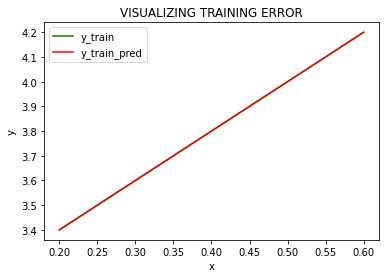

In [51]:
#Plot a line graph
import matplotlib.pyplot as plt
plt.plot(x_train_list,y_train_list,label='y_train',color='green')
plt.plot(x_train_list,y_train_pred,label='y_train_pred',color='red')

# Add labels and title
plt.title("VISUALIZING TRAINING ERROR")
plt.xlabel("x")
plt.ylabel("y")
 
plt.legend()
plt.show()

**TESTING ERROR**

In [52]:
x_test


,x
3,0.8
4,1.0


In [53]:
y_test

,y
3,4.6
4,5.0


In [54]:
y_test_pred = []
for i in x_test['x']:
  ycalc = mi*i+ci
  y_test_pred.append(ycalc.round(1))
y_test_pred

[4.6, 5.00000000000000]

In [58]:
y_test_list = list(y_test['y'])

In [59]:
mse_test_total=0
MSError_test = []
for i in range(0,len(x_test)):
  mse_test = (y_test_list[i]-y_test_pred[i])
  mse_test_total+=mse_test
  MSError_test.append(mse_test)


print('MSE - TESTING ERROR obtained:')
print(MSError_test)
print('Mean Square Error: ',mse_test_total/len(x_test))

MSE - TESTING ERROR obtained:
[-0.00156250000000036, 0]
Mean Square Error:  -0.000781250000000178


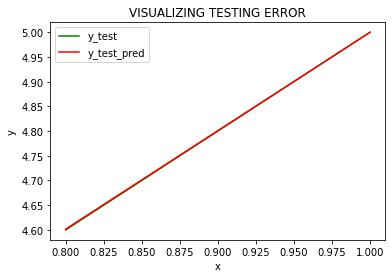

In [60]:
x_test_list = list(x_test['x'])
y_test_list = list(y_test['y'])
#Plot a line graph
plt.plot(x_test_list,y_test_list,label='y_test',color='green')
plt.plot(x_test_list,y_test_pred,label='y_test_pred',color='red')

# Add labels and title
plt.title("VISUALIZING TESTING ERROR")
plt.xlabel("x")
plt.ylabel("y")
 
plt.legend()
plt.show()

**PREDICT**

In [63]:
print("EQUATION is y=mx+c")
x = float(input('Enter x value to predict y value:'))

y = (mi*x+ci).round(2)
y_test_pred.append(y)
print('Predicted y value: {}'.format(y))

EQUATION is y=mx+c
Enter x value to predict y value:1.8
Predicted y value: 6.60
